In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy

%cd /usr/local/lib/python3.8/dist-packages/konlpy/java

!jar xvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar

with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 40.9 MB/s eta 0:00:00
/usr/local/lib/python3.8/dist-packages/konlpy/java
  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/proce

In [3]:
data += '여기어때\n데일리호텔\n야놀자\n인터파크투어\n마이리얼트립\n호텔스닷컴\n익스피디아\n에어비앤비\n부킹닷컴\n트리바고\n스카이스캐너\n호텔스컴파인\n아고다\n가성비\n코로나\n최저가\n본인인증\n체크인\n체크아웃\n카카오톡'

with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [4]:
!jar cvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar * 

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/comm/HannanumInterface.class(in = 3352) (out= 1633)(deflated 51%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/komoran/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/komoran/KomoranInterface.class(in = 2460) (out= 1213)(deflated 50%)
adding: bin/kr/lucypark/okt/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/okt/OktInterface.class(in = 3075) (out= 1460)(deflated 52%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkm

In [5]:
import pandas as pd


topic_5 = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_5.csv')

In [6]:
topic_5 = topic_5.drop(columns = ['Unnamed: 0'])

topic_5

,text
0,고객 응대가 최악 고객센터 문의하면 숙박 이후에 답장 오는 엄청난 속도 일부러 그러...
1,즉시 취소조차도 규정상 안 된다며 매크로 답변 반복하는 고객센터 다시는 안 쓴다지 ...
2,고객을 개무시하는 앱 개짜증 나 고 별개도 아까움 환 불안해주려고 전화 안 받고 카...
3,방도 주차장 있다 해서 가보면 건너편 다른 건물에 주차장 있고 ㅋㅋ 자세하게 잘 써...
4,콘서트 땜에 숙박 비 올리려고 한 거 같은데 야놀자 고객센터에선 온수 공사한...
...,...
1021,고객센터 상담원 연결이 아예 되질 않네요 전화 카카오톡 수십 번 했습니다 고객센터에...
1022,장난하나요 호텔 입을 자 변경 정보 요청드렸는데 일이 되도록 연락이 없고 고객센터는...
1023,고객센터 전화 카톡 절대 문의 불 가임 왜 받질 않으니까
1024,도대체 연결도 되지 않는 고객센터 전화랑 카카오톡 상담원 연결은 의미가 뭐죠 예약 ...


In [7]:
import pickle

with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","rb") as f:
    stop_words = pickle.load(f)

In [8]:
!pip install gensim
!pip install wget

import gensim
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
import re
from tqdm import tqdm
import time

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
          if len(word) > 1:
            if word not in stop_words:
              words.append(word)            
    return words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=dcb33ae33b6e4e8f5b9fb6c47435fe92d356a5020c605e8614a9e0ac9d2583af
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [9]:
topic_5.shape

(1026, 1)

In [10]:
tokenized_list = []

for text in tqdm(topic_5['text'][:1530]):                 # 숫자 수정
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 1026/1026 [00:36<00:00, 28.31it/s] 

1026
['고객', '응대', '고객', '센터', '문의', '답장', '속도']


In [11]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_5.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_5.reset_index(drop=True, inplace=True)

In [12]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [13]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
wget.download(url)

!unzip mallet-2.0.8.zip

import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/usr/local/lib/python3.8/dist-packages/konlpy/java/mallet-2.0.8/bin/mallet'

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [14]:
import gensim
import gensim.corpora as corpora
from gensim import corpora
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 10 ) #5회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=words_bigram, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 2  has Coherence Value of 0.331419161774141
Num Topics = 3  has Coherence Value of 0.25709008589805166
Num Topics = 4  has Coherence Value of 0.2931055152595108


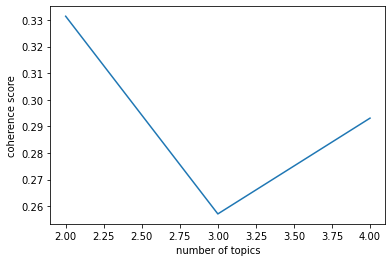

In [23]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=2, limit=5, step=1)

limit=5; start=2; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fro

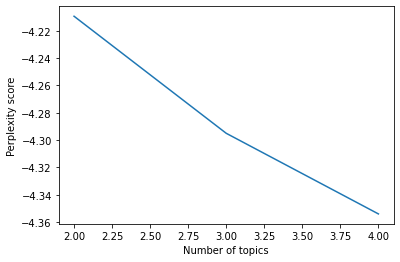

In [24]:
perplexity_values = []
for i in range(2,5): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

x = range(2,5)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [25]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [26]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.000521  0.0       1        1  50.334225
1     -0.000521  0.0       2        1  49.665775, topic_info=    Term       Freq      Total Category  logprob  loglift
90   코로나  57.000000  57.000000  Default  30.0000  30.0000
74    가능  61.000000  61.000000  Default  29.0000  29.0000
83    객실  61.000000  61.000000  Default  28.0000  28.0000
122  플랫폼  63.000000  63.000000  Default  27.0000  27.0000
77    이유  62.000000  62.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
120  이야기  31.530847  65.997252   Topic2  -4.8213  -0.0388
89    상품  31.193364  64.118930   Topic2  -4.8320  -0.0207
6     규정  31.082427  63.695149   Topic2  -4.8356  -0.0176
50   이메일  31.019934  61.990685   Topic2  -4.8376   0.0075
36    실수  31.021751  62.962117   Topic2  -4.8375  -0.0080

[118 rows x 6 columns], token_table=      Topic      Freq Term
term                      
74        1  0.437567   가능
74        2  0.551010   가능
83        1  0.453689   객실
83        2  0.550908   객실
126       1  0.479684   검색
...     ...       ...  ...
67        2  0.469641   하자
52        1  0.527154  호스트
52        2  0.479231  호스트
39        1  0.541598   환불
39        2  0.456973   환불

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [27]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=20)                            #이거 숫자 바꿈
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, topic_5['text']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.5131,"연락, 상담, 환불, 고객, 통화, 규정, 답변, 직원, 고객_센터, 회사, 하루,...",고객 응대가 최악 고객센터 문의하면 숙박 이후에 답장 오는 엄청난 속도 일부러 그러...
598,598,0.0,0.5786,"연락, 상담, 환불, 고객, 통화, 규정, 답변, 직원, 고객_센터, 회사, 하루,...",환불 규정 진짜 개떡 같고 고객센터 연결은 하늘에 별 따기 카카오톡 상담도 연락한 ...
599,599,0.0,0.5128,"연락, 상담, 환불, 고객, 통화, 규정, 답변, 직원, 고객_센터, 회사, 하루,...",여기 상담직원 명도 안 되는 듯
604,604,0.0,0.5195,"연락, 상담, 환불, 고객, 통화, 규정, 답변, 직원, 고객_센터, 회사, 하루,...",예약은 쉽지만 취소하기는 너무 어려운 업체하고 통화하니 야놀자 통화해서 취소 요청해...
605,605,0.0,0.5681,"연락, 상담, 환불, 고객, 통화, 규정, 답변, 직원, 고객_센터, 회사, 하루,...",상담원 연결 거의 불가능 전 직원 통화 중 하루 종일 매우 불친절 및 매뉴얼 응대 ...
...,...,...,...,...,...
603,603,1.0,0.5115,"취소, 전화, 고객_센터, 연결, 문의, 카톡, 상담, 결제, 상담사, 새벽, 대응...",상담이 안 되네 요 카톡 기능도 있고 상담 시간이고 해서 문의를 해도 답이 없는 건...
237,237,1.0,0.5167,"취소, 전화, 고객_센터, 연결, 문의, 카톡, 상담, 결제, 상담사, 새벽, 대응...",이 어플 통해 구매 코드 메일 보냈다는 데 안 와서 문의했으나 답변 없...
607,607,1.0,0.5712,"취소, 전화, 고객_센터, 연결, 문의, 카톡, 상담, 결제, 상담사, 새벽, 대응...",ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 예약할 때마다 오류 나서 고객센터에 전화를 해야 되는 게 ...
243,243,1.0,0.5055,"취소, 전화, 고객_센터, 연결, 문의, 카톡, 상담, 결제, 상담사, 새벽, 대응...",마이리얼트립에서 항공권 왕복 예매하고 고생하고 있는 인입니다 미국과 한국 왕복권인데...


In [28]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "text", "Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num", "Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'] +1
df_topic_review.Dominant_Topic = df_topic_review.Dominant_Topic.astype(str)
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'].str.split('.').str[0]

In [29]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"연락, 상담, 환불, 고객, 통화, 규정, 답변, 직원, 고객_센터, 회사, 하루,...",562,0.5483
1.0,2,"취소, 전화, 고객_센터, 연결, 문의, 카톡, 상담, 결제, 상담사, 새벽, 대응...",463,0.4517


In [30]:
lda_inform.to_excel('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_topic_5.xlsx')

In [31]:
df_dominant_topic.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/topic_topic_5_dominant.csv')